In [1]:
using Gadfly

In [1]:
using LotkaVolterra

In [ ]:
Pkg.test("LotkaVolterra")

INFO: Testing LotkaVolterra
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Volumes/Julia 1/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Volumes/Julia 

In [3]:
Z = PredatorPrey(1.,1.,1.,1.)

LotkaVolterra.PredatorPrey(1.0,1.0,1.0,1.0)

In [ ]:
times = linspace(0,100,256)
z0 = [.5,.5]
times,z = odeint(Z,z0,times)
x,y = zip(z...)
x,y = [x...],[y...];

In [ ]:
x

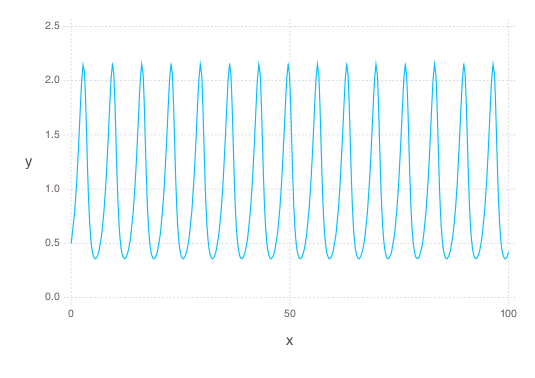

In [22]:
plot(layer(x=times,y=x,Geom.line))

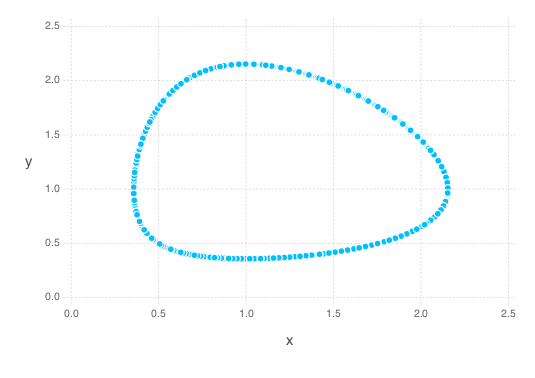

In [13]:
plot(x=x,y=y,Geom.point)

In [2]:
r,K = 1.,1.
Z = LogisticGrowth(r,K)

LogisticGrowth(1.0,1.0)

In [3]:
fixedpoints(Z,:feasible)

1-element Array{Float64,1}:
 1.0

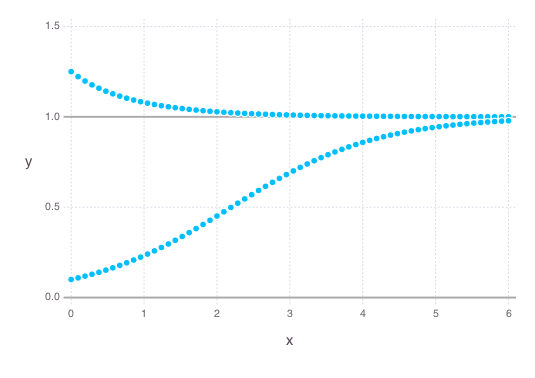

In [30]:
times = linspace(0,6,64)
xgrowing,xshrinking = odeint(Z,.1*K,times),odeint(Z,1.25*K,times)
plot(layer(x=times,y = xgrowing,Geom.point),layer(x=times,y = xshrinking,Geom.point),
     layer(yintercept = [1.],Geom.hline(size=0.5mm, color="darkgray")),
     layer(yintercept = [0.],Geom.hline(size=0.5mm, color="darkgray")))

In [2]:
function nondimclv2d(a12,a21)
    ρ=1
    r = [1.,ρ]
    A = -[1 a12; ρ*a21 ρ]
    return GeneralizedLotkaVolterra(r,A)
end

nondimclv2d (generic function with 1 method)

In [11]:
Zs = [nondimclv2d(a12,a21) for a12=[1/3,4/3], a21=[1/3,4/3]]
xs = map(Z->collect(fixedpoints(Z,:stable)),Zs)

2x2 Array{Array{Any,1},2}:
 {[0.75,0.75]}  {[1.0,0.0]}          
 {[0.0,1.0]}    {[1.0,0.0],[0.0,1.0]}

In [14]:
map(length,xs)

2x2 Array{Int64,2}:
 1  1
 1  2

In [29]:
xs

2x2 Array{Array{Any,1},2}:
 {[0.75,0.75]}  {[1.0,0.0]}          
 {[0.0,1.0]}    {[1.0,0.0],[0.0,1.0]}

In [27]:
xs[1,1][1][2] - 3/4

1.1102230246251565e-16

In [30]:
Pkg.test("LotkaVolterra")

INFO: Testing LotkaVolterra
INFO: LotkaVolterra tests passed
INFO: No packages to install, update or remove


In [4]:
collect(sectors(Z,:feasible))

3-element Array{Any,1}:
 [1]  
 [2]  
 [1,2]

In [11]:
collect(sectors(Z,:stable))

1-element Array{Any,1}:
 [1,2]

In [10]:
collect(fixedpoints(Z))

4-element Array{Any,1}:
 [0.0,0.0]
 [1.0,0.0]
 [0.0,1.0]
 [0.8,0.6]

In [2]:
Z = PredatorPrey(1.,2.,.1,.2)

PredatorPrey(1.0,2.0,0.1,0.2)

In [6]:
times = linspace(0,5,256)
times,x = odeint(Z,[.5,.5],times)

([0.0,0.0196078,0.030478,0.0392157,0.0588235,0.0784314,0.0980392,0.117647,0.137255,0.156863  …  4.83064,4.84314,4.86275,4.88235,4.90196,4.92157,4.94118,4.96078,4.98039,5.0],[[0.5,0.5],[0.500185,0.481243],[0.500444,0.47115],[0.500731,0.46319],[0.501623,0.445812],[0.502851,0.429085],[0.504409,0.412988],[0.506287,0.397499],[0.508477,0.382594],[0.510972,0.368251]  …  [37.2287,0.0013095],[37.6957,0.00133835],[38.4401,0.00138642],[39.199,0.00143831],[39.9729,0.00149447],[40.762,0.00155534],[41.5665,0.00162137],[42.3869,0.001693],[43.2233,0.00177068],[44.0761,0.00185485]])

In [8]:
x[1]

2-element Array{Float64,1}:
 0.5
 0.5

In [11]:
collect(fixedpoints(Z,:stable))

0-element Array{Any,1}

2-element Array{Float64,1}:
  1.0
 -0.0

In [74]:
N = 3
r = [1.,2.,3.]
A = -(I -.25*ones(3,3))
Z = GeneralizedLotkaVolterra(r,A)

GeneralizedLotkaVolterra{Array{Float64,1},Array{Float64,2}}([1.0,2.0,3.0],3x3 Array{Float64,2}:
 -0.75   0.25   0.25
  0.25  -0.75   0.25
  0.25   0.25  -0.75)

In [76]:
collect(fixedpoints(Z))

7-element Array{Any,1}:
 [1.33333,0.0,0.0]
 [0.0,2.66667,0.0]
 [0.0,0.0,4.0]    
 [2.5,3.5,0.0]    
 [3.0,0.0,5.0]    
 [0.0,4.5,5.5]    
 [7.0,8.0,9.0]    

In [28]:
jacobian(Z,[1,2])

3x3 Array{Float64,2}:
 -1.18286    0.102857  0.102857
  0.182857  -2.10286   0.182857
  0.0        0.0       3.0     

In [6]:
collect(sectors(Z,:unviable))

6-element Array{Array{Int64,1},1}:
 [1]  
 [2]  
 [3]  
 [1,2]
 [1,3]
 [2,3]

In [14]:
fixedpointss(Z,:stable)

0

In [15]:
function fixedpointss(Z::AbstractLotkaVolterra,kind::Symbol)
    allsectors = sectors(Z)
    
end

fixedpointss (generic function with 1 method)

In [12]:
methods(!)

# 3 methods for generic function "!":
!(x::Bool) at bool.jl:19
!(B::BitArray{N}) at bitarray.jl:842
!(A::Union(SubArray{Bool,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{Bool,N})) at array.jl:683

In [7]:
collect()

1-element Array{Array{Int64,1},1}:
 [1,2,3]

In [23]:
instrinsicrate

LoadError: instrinsicrate not defined
while loading In[23], in expression starting on line 1

In [7]:
chain([subsets([1,2,3,4],i) for i=1:4]...)

LoadError: subsets not defined
while loading In[7], in expression starting on line 1

In [1]:
using Iterators

In [6]:
using Iterators

In [9]:
methods(produce)

# 2 methods for generic function "produce":
produce(v) at task.jl:95
produce(v...) at task.jl:139

In [11]:
methods(imap)

# 1 method for generic function "imap":
imap(mapfunc,it1,its...) at /Users/gajomi/.julia/Iterators/src/Iterators.jl:537

In [2]:
n = 4

4

In [7]:
taco = chain([subsets([1:n],i) for i=1:n]...)

Chain({Binomial{Int64}([1,2,3,4],4,1),Binomial{Int64}([1,2,3,4],4,2),Binomial{Int64}([1,2,3,4],4,3),Binomial{Int64}([1,2,3,4],4,4)})

In [8]:
collect(taco)

15-element Array{Array{Int64,1},1}:
 [1]      
 [2]      
 [3]      
 [4]      
 [1,2]    
 [1,3]    
 [1,4]    
 [2,3]    
 [2,4]    
 [3,4]    
 [1,2,3]  
 [1,2,4]  
 [1,3,4]  
 [2,3,4]  
 [1,2,3,4]

In [7]:
methods(subsets)

# 2 methods for generic function "subsets":
subsets(xs) at /Users/gajomi/.julia/Iterators/src/Iterators.jl:567
subsets(xs,k) at /Users/gajomi/.julia/Iterators/src/Iterators.jl:612

In [26]:
fixedpoint(Z,[1,2])

LoadError: communitymatrix not defined
while loading In[26], in expression starting on line 1

In [34]:
taco = rand(2,2)

2x2 Array{Float64,2}:
 0.0588316  0.553027
 0.604108   0.191679

In [36]:
pizza = rand(2)

2-element Array{Float64,1}:
 0.335187
 0.581375

In [44]:
==(size(taco)...,)

LoadError: `==` has no method matching ==(::Int64, ::Int64, ::Int64)
while loading In[44], in expression starting on line 1

In [49]:
([1,1,1])

LoadError: `.==` has no method matching .==(::Array{Int64,1})
while loading In[49], in expression starting on line 1

In [4]:
system = systems[3]

LotkaVolterraSystem{Array{Float64,1},Array{Float64,2}}(2,[1.0,1.0],2x2 Array{Float64,2}:
 -1.0  -2.0
 -2.0  -1.0)

In [5]:
fixedpoint(system)

2-element Array{Float64,1}:
 0.333333
 0.333333

getindex (generic function with 185 methods)

In [31]:
(1==2)

false

In [32]:
A = MFInteractionMatrix(rand(4),-.1)

4x4 MFInteractionMatrix:
  0.931478   -0.0685225  -0.0685225  -0.0685225
 -0.03979     0.96021    -0.03979    -0.03979  
 -0.0910654  -0.0910654   0.908935   -0.0910654
 -0.0196487  -0.0196487  -0.0196487   0.980351 

In [53]:
methods(.==)

# 5 methods for generic function ".==":
.==(x::Number,y::Number) at operators.jl:100
.==(A::AbstractArray{Bool,N},B::AbstractArray{Bool,N}) at broadcast.jl:335
.==(A::AbstractArray{T,N},B::AbstractArray{T,N}) at broadcast.jl:332
.==(A,B::AbstractArray{T,N}) at broadcast.jl:384
.==(A::AbstractArray{T,N},B) at broadcast.jl:384

In [59]:
all([size(taco)...] .== length(pizza))

true

In [72]:
toast = rand(2,2)

2x2 Array{Float64,2}:
 0.835277  0.615971
 0.825028  0.511303

true